# **MODEL PROJECT: NASH EQUILIBRIA IN OLIGOPOLY MODELS - SUSTAINING COALITION IN COURNOT**

By Emma Knippel, Anna Abildskov and Oscar Nyholm

# 1 Imports and Set magics

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib inline

# local modules
import modelproject
from modelproject import CournotDuopoly
from modelproject import BertrandOligopoly

# 2 Model description

**2.1 Markets with oligopoly**

two firms bla bla bla
The market with oligopoly is set up with a linear inverse demand function and a production fucntion with a constant marginal cost.
$$\begin{aligned} 
p(q) = a - bq\\
C(q) = cq
\end{aligned}$$

**2.2 Cournot Oligopoly**

In the Cournot Oligopoly, we have two similar firms producing two goods: $q_1$ and $q_2$. The total production is $q \equiv q_1 + q_2$. 
Thus, the equations above in he Cournot oligopoly become:
$$\begin{aligned}
&p(q_1,q_2) = a-b(q_1+q_2)\\
&C(q_i) = cq_i, &\;\text{for } i = 1,2
\end{aligned}$$
The firms profits of each firm depends not only on their own production, but of the other firm:
$$\begin{aligned} 
\pi_1(q_1,q_2) = p(q_1,q_2)q_1-C(q_1)\\
\pi_2(q_1,q_2) = p(q_1,q_2)q_2-C(q_2)
\end{aligned}$$

**2.3 Bertrand Oligopoly**

In the Bertrand Oligopoly, we utilize the demand function (not the inverse) and we keep the production functionn with a constant marginal cost, $C(q)$:
$$\begin{align}
D(p)=\frac{a-p}{b}
\end{align}$$
The main difference in the Bertrand oligopoly is that the firms  each set individual prices, $p_1,p_2$ instead of being price-takers.
We also make the following assumptions:
* If the prices are different, all consumers buy from the firm with the lower price.

* If the firms set the same price, they split the consumers evenly between them.

* The produced quantity follows from the demand function.

Therefore, the firm's sold quantities depend on their individual demand function, $D_1$ and $D_2$:
$$\begin{aligned}
D_1(p_1,p_2)=
\begin{cases} 
D(p_1) & \text{for } p_1 < p_2 \\
\frac{D(p_1)}{2} & \text{for } p_1 = p_2 \\
0 & \text{for } p_1 > p_2 
\end{cases}
\end{aligned}$$

$$\begin{aligned}
D_2(p_1,p_2)=
\begin{cases} 
D(p_2) & \text{for } p_2 < p_1 \\
\frac{D(p_2)}{2} & \text{for } p_1 = p_2 \\
0 & \text{for } p_2 > p_1 
\end{cases}
\end{aligned}$$

This implies the following profit functions:
$$\begin{aligned}
\pi_1(p_1,p_2)=(p_1-c)D_1(p_1,p_2)\\
\pi_2(p_1,p_2)=(p_2-c)D_2(p_1,p_2)
\end{aligned}$$

## 3 Analytical solution

**3.1 Cournot Analytical Solution**

Each firm attempts to maximize profits given the quantity set by the other firm:
$$\begin{aligned} 
\max_{q_1} p(q_1,q_2)q_1-C(q_1)\\
\max_{q_2} p(q_1,q_2)q_2-C(q_2)
\end{aligned}$$

This implicates the following first order condition:
$$\begin{aligned} 
FOC_1 = \frac{∂\pi_1(q_1,q_2)}{∂q_1}=0\\
\Leftrightarrow q_1^*(q_2)=\frac{a-c}{2b}-\frac{1}{2}q_2,
\end{aligned}$$
which is equivalent for the other firm:
$$\begin{aligned}
FOC_2 =  \frac{∂\pi_2(q_1,q_2)}{∂q_2}=0\\
\Leftrightarrow q_2^*(q_1)=\frac{a-c}{2b}-\frac{1}{2}q_1,
\end{aligned}$$

When both firms are best-responding to each other, we achieve the following symmetric Nash Equilibrium:
$$\begin{aligned}
q_1^* = q_2^* = \frac{a-c}{3b}
\end{aligned}$$

**3.2 Bertrand Analytical Solution**

Once again, each firm attempts to maximize profits given the price set by the other firm:
$$\begin{align}
\max_{p_1}(p_1-c)D_1(p_1,p_2)\\
\max_{p_2}(p_2-c)D_2(p_1,p_2)
\end{align}$$

The assumptions made in 2.3 mean that the solution to the Bertrand model is slightly different. Intuitively, it goes through the following four steps:
1. No one will ever set a price below marginal cost, where he/she will lose money with every unit produced. 

2. When one firm sets a price higher than marginal cost, the other firm can always set a slightly lower price and steal the entire market.

3. Because of steps 1 and 2, in equilibrium the two firms compete until the equilibrium price is $p_1 = p_2 = c$.

Therefore, the unique Nash Equilibrium, where both firms are best-responding to the other's price-setting is defined as:
$$\begin{aligned}
p_1^* = p_2^* = c
\end{aligned}$$

Which is exactly what we observe under perfect competition.

## 4 Numerical solution

**SUPER VIGTIGT!!! Husk at give en klar definition af de ydre bounds på a, b og c, for hvis a bliver lavere end c, så går quantity i minus og det må den selvfølgelig ikke**

In [2]:
cournot_dp = CournotDuopoly(20,1,5)
cournot_dp.ne_plot()


interactive(children=(IntSlider(value=35, description='a', max=50, min=20), FloatSlider(value=0.5, description…

Nash Equilibrium:
Price for Firm 1: 19.99999556762366
Price for Firm 2: 19.99999556762366


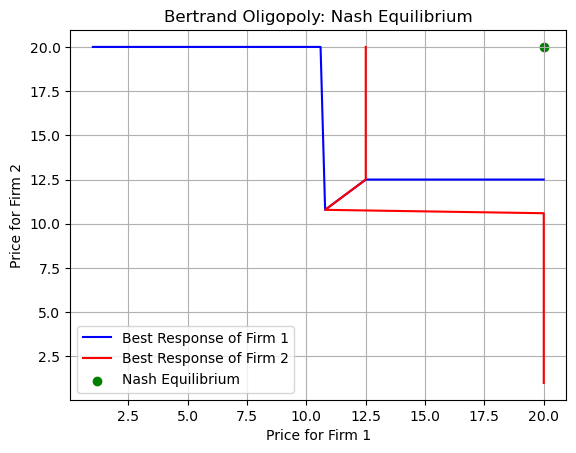

In [3]:
bertrand_op = BertrandOligopoly(20,1,5)

p1_ne, p2_ne = bertrand_op.nash_equilibrium()
print("Nash Equilibrium:")
print("Price for Firm 1:", p1_ne)
print("Price for Firm 2:", p2_ne)
p_min = 1
p_max = 20
num_points = 100
p_range = np.linspace(p_min, p_max, num_points)
bertrand_op.plot_nash_equilibrium(p_range)


0

**Comparison of Cournot and Bertrand Duopoly**
- Why are they different? Quantity vs. price
- What are the quantitites and prices they end up in, respectively. 

# 5 Further analysis

Make detailed vizualizations of how your model changes with parameter values. 
- Måske skal den interaktive model af Cournot herned?? Og så have en simpel figur for et sæt af værdier ovenfor?

Try to make an extension of the model. 
- Using interpolation til at vise konvergering af Cournot oligopol, hvor alle virksomheder har indflydelse på markedet, til fuldkommen konkurrence market

In the Cournot Oligopoly, we have $i$ identical firms producing the same goods: $q_i$. The total production is $q \equiv \sum_{i=1}^{N} q_i$. 
Thus, the equations in he Cournot oligopoly become:
$$\begin{aligned}
&p(q) = a-b(q_1+q_2+...+q_N)\\
&C(q_i) = cq_i, &\;\text{for } i = 1,2,...,N
\end{aligned}$$


The profits of each firm depends not only on their own production, but of the other firms as well:
$$\begin{aligned}
\pi_{i}(q_1,q_2,...,g_N) = p(q_1,q_2,...,q_N)q_i-C(q_i)
\end{aligned}$$


The analytical solution is the same as for a Cournot Duopoly, each firm sets the quantity they produce as a BR to the other firms quantity.
$$\begin{aligned}
\max_{q_i} p(q)q_i-C(q_i),  &\;\text{for } q=(q_1+...+q_N)\\
\end{aligned}$$

This implicates the following first order condition for all firms:
$$\begin{aligned}
FOC_i = \frac{∂\pi_i(q_1,...,q_N)}{∂q_i}=0\\
\Leftrightarrow q_i^*(q_1,...,q_N)=\frac{a-c}{Nb}-\frac{1}{N}(q_1,...,g_N),
\end{aligned}$$

The unique equilibrium is therefor still when all firms set their quantities as their BR to each other:
$$\begin{aligned}
q_1^* = q_2^* = ... = q_N^* =
\end{aligned}$$

As shown in the preliminary analysis, the Cournot Duopoly, i.e. two firms present within the market, has the quantity and price somewhere between a simple monopoly and a market with full competition. For our extension, we are interested in examining how many firms are needed withtin the market for the Cournot Oligopoly to be equal to a market with full competetion in regards to quantity produced and price set, given certain levels of costs. 

To examine this, we use interpolation. We therefor need a certain set of known points and their corrosponding values. The known points are the amount of firms, $i$, and the values are the equilibrium value of quantities.

In [4]:
from scipy import interpolate


# COPIED FROM DYN. OPT. LECTURE; IKKE REDIGERET #
def linear_interpolate(G,F,x):
    """ linear interpolation (and extrapolation)
    
    Args:
    
        G (np.ndarray): known points
        F (np.ndarray): known values
        x (float): point to be interpolated
        
    Returns:
    
        y (float): intepolated value
    
    """
    
    assert len(G) == len(F)
    n = len(G)
    
    # a. find index in known points
    if x < G[1]: # exprapolation below
    
        i = 0
    
    elif x > G[-2]: # extrapolation above
        
        i = n-2

    else: # true interpolation
        
        # search
        i = 0 
        while x >= G[i+1] and i < n-1:
            i += 1
        
        # check
        assert x >= G[i]
        assert x < G[i+1]

    # b. interpolate
    diff_G = G[i+1]-G[i]
    diff_F = F[i+1]-F[i]
    slope = diff_F/diff_G
    y = F[i] + slope*(x-G[i])
    
    return y

# 6 Conclusion

Add concise conclusion. 